[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)

## Global Meteoric Water Line
GMWL is a relation between oxygen-18 $^{18}O$ and deuterium $^2H$.
In Craig 1961 (https://doi.org/10.1126/science.133.3465.1702) it is expressed as $\delta^{18}O$ to $\delta D$.
Here we provide general form for this relation but using $\alpha(T)$.


In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [9]:
import numpy as np
from PySDM import Formulae
from PySDM.physics import si
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [10]:
f = Formulae(isotope_equilibrium_fractionation_factors='HoritaAndWesolowski1994')

In [11]:
T = 283.15 * si.K
alpha_O = f.isotope_equilibrium_fractionation_factors.alpha_l_18O
alpha_D = f.isotope_equilibrium_fractionation_factors.alpha_l_2H

In [12]:
def A(alpha_D, alpha_O, B):
    return (alpha_D - 1 - B)/(alpha_O - 1)

def B(alpha_D, alpha_O, A):
    return alpha_D - 1 - A * (alpha_O - 1)

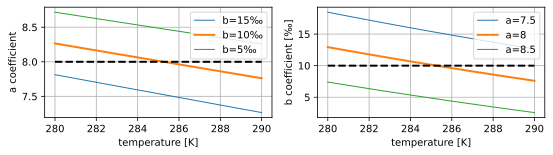

In [13]:
T = np.linspace(280, 290) * si.K
thick = 2
thin = 1

fig, axs = pyplot.subplots(1, 2, figsize=(9, 2))

for b in (.015, .01, .005):
    axs[0].plot(T, A(alpha_D(T), alpha_O(T), b), label=f"b={b*1000:.3g}‰", linewidth=thick if b==.01 else thin)
axs[0].set_ylabel('a coefficient')
axs[0].hlines(8, xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')

for a in (7.5, 8, 8.5):
    axs[1].plot(T, 1000*B(alpha_D(T), alpha_O(T), a), label=f"{a=}", linewidth=thick if a==8 else thin)
axs[1].set_ylabel('b coefficient [‰]')
axs[1].hlines(10, xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')

for ax in axs:
    ax.legend()
    ax.grid()
    ax.set_xlabel('temperature [K]')
show_plot('fig.pdf')